#數據探索


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()
x,y = boston.data, boston.target
x, boston.feature_names

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [3]:
traindata=pd.read_csv('Boston_train.csv', encoding='utf-8-sig',index_col=0)
traindata.dtypes
traindata.shape

(406, 14)

In [4]:
df=pd.DataFrame(x,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDVprice'] = pd.DataFrame(y,columns=['MEDVpirce'])
x =df.iloc[:,0:13]
y =df.iloc[:,-1]
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVprice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 分割數據集

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.197,random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 100
number of training samples: 406


In [6]:
x_train.isnull( ).sum( )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 建立線性模型


In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.intercept_,lm.coef_)
r2_train= lm.score(x_train, y_train)
r2_test= lm.score(x_test, y_test)
print(r2_train, r2_test)

42.28626298344837 [-1.11032620e-01  5.79772626e-02  1.68950489e-02  2.13839616e+00
 -1.92748521e+01  3.11124463e+00  5.50103108e-03 -1.48228753e+00
  3.01624408e-01 -1.11359165e-02 -9.88363922e-01  7.97485768e-03
 -5.42907603e-01]
0.7293635681762961 0.7652426102750569


# 數據可視化

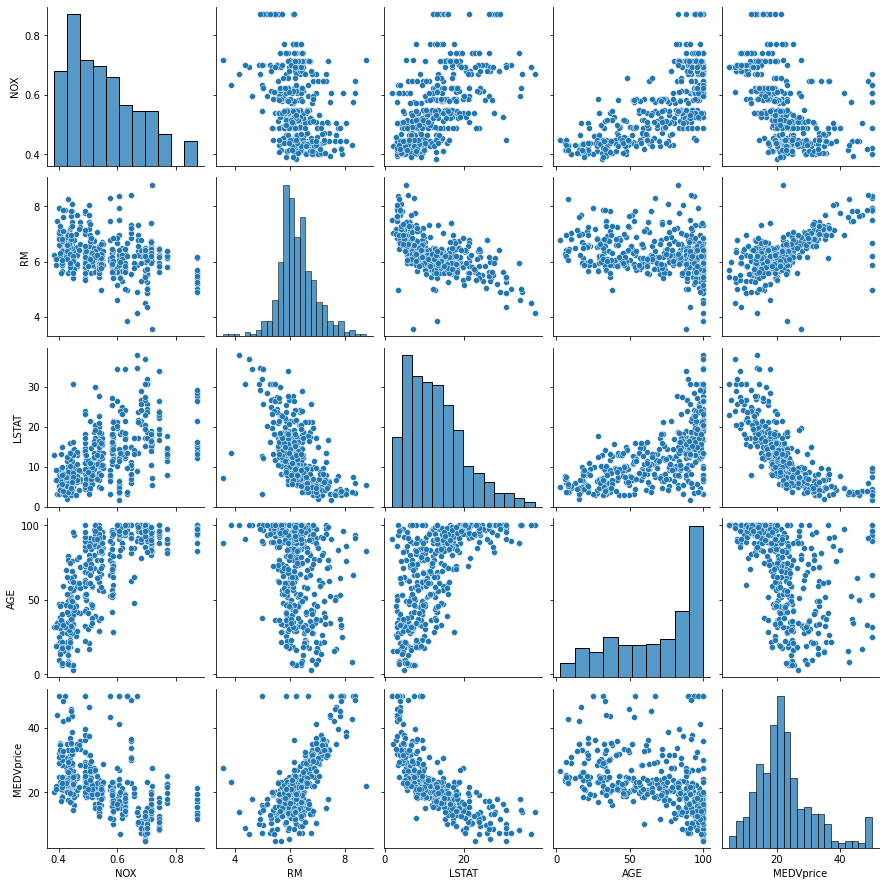

In [8]:
cols =['NOX','RM', 'LSTAT', 'AGE','MEDVprice']
sns.pairplot(traindata[cols])
sns.set(font_scale =1.5)
plt.savefig('./pairplot.png', dpi=300)


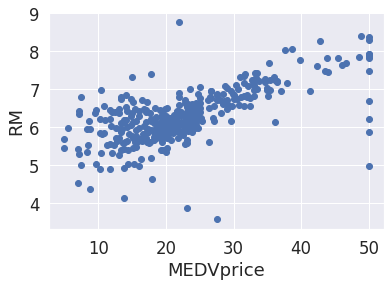

In [62]:
plt.xlabel('MEDVprice')
plt.ylabel('RM')
plt.scatter(x='MEDVprice', y ='RM',data=traindata)
plt.savefig('./RM_PRICE.png',dpi =300)

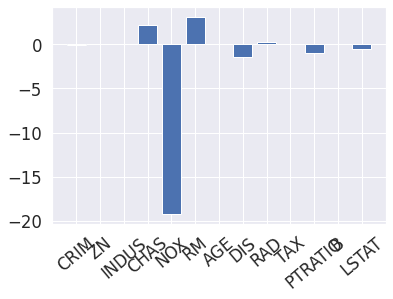

In [10]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(feature_names , lm.coef_)
plt.xticks(rotation=40)
plt.show()

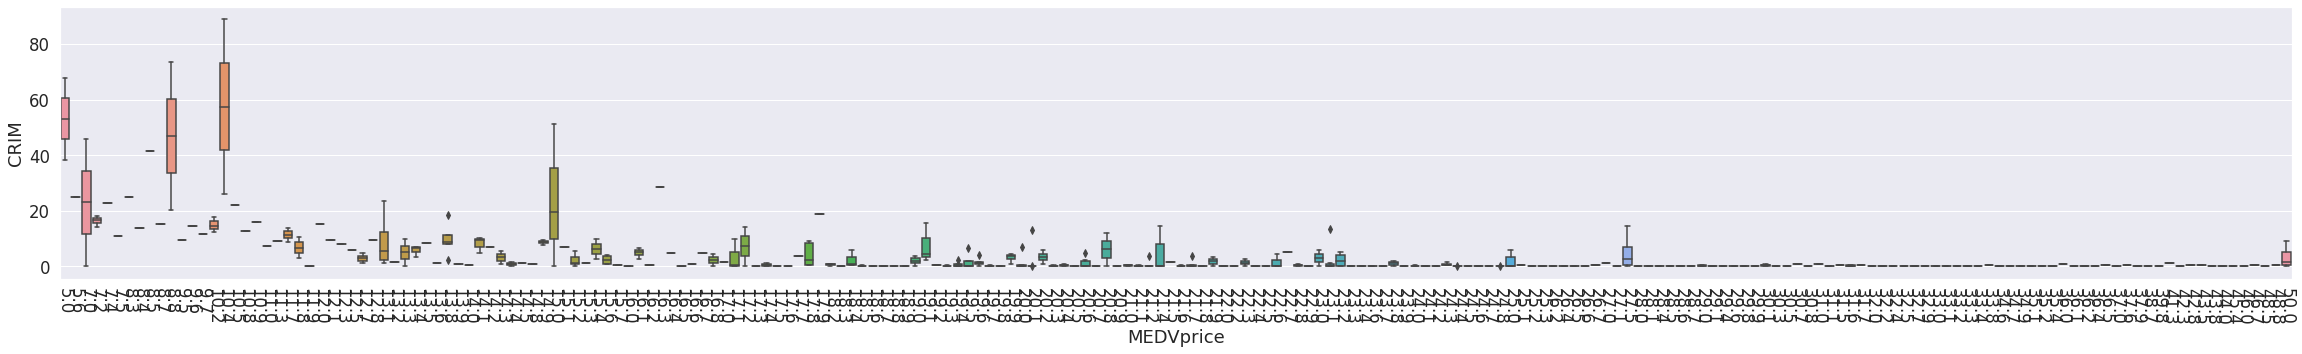

In [11]:
plt.figure(figsize =(40,5))
plt.xticks(rotation = -90)
sns.boxplot(x='MEDVprice', y ='CRIM',data=traindata )
#犯罪率vs自用住宅房價中位數

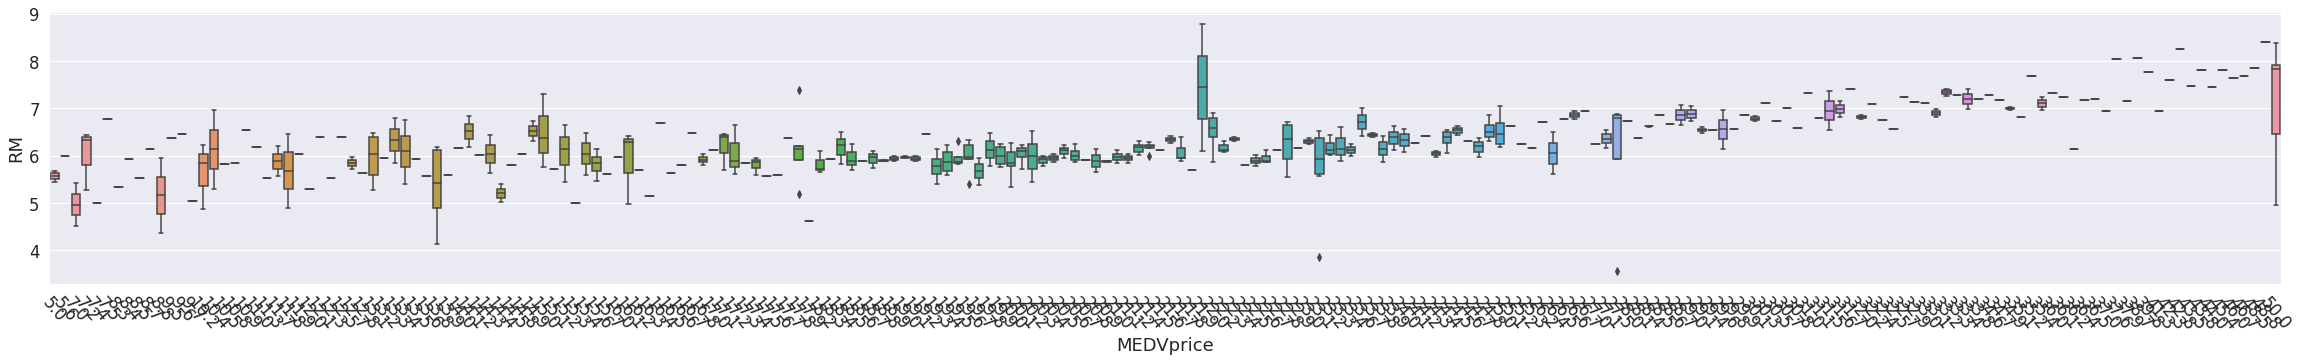

In [12]:
plt.figure(figsize =(40,5))
plt.xticks(rotation = -50)
sns.boxplot(x='MEDVprice', y ='RM',data=traindata )
plt.savefig('./rm.png', dpi=300)


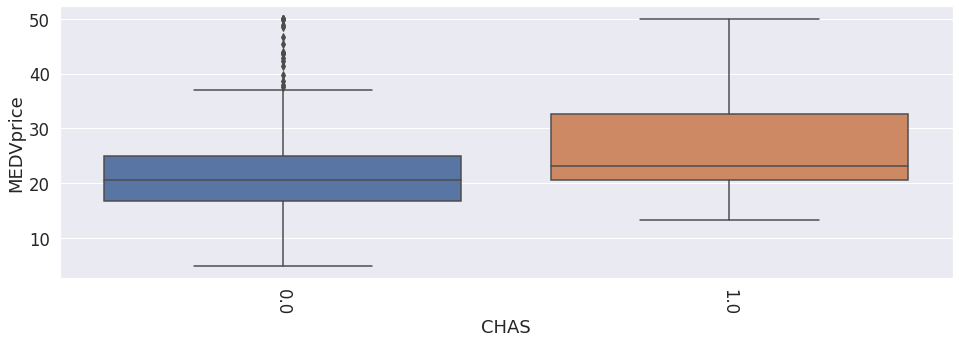

In [13]:
plt.figure(figsize =(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='CHAS', y ='MEDVprice',data=traindata )
plt.savefig('./chas.png', dpi=300)

#距離CHAS湖vs房價

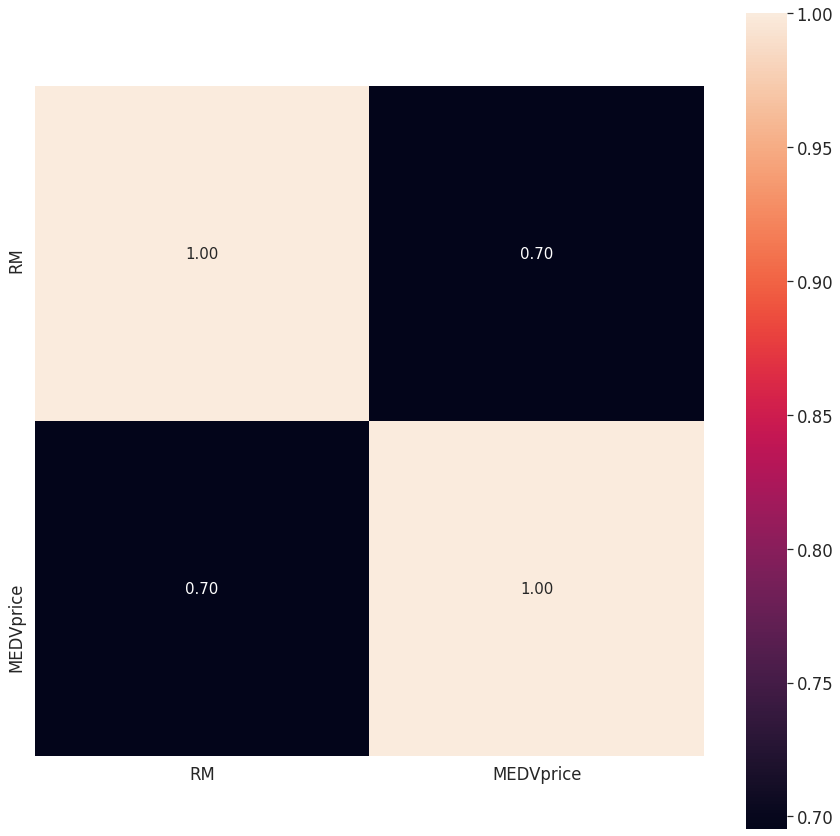

In [14]:
import numpy as np
plt.figure(figsize=(15,15))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale =1.5)
hm = sns.heatmap(cm
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 15}
                 ,yticklabels=cols
                 ,xticklabels=cols)
sns.set(font_scale =1.5)
plt.show()

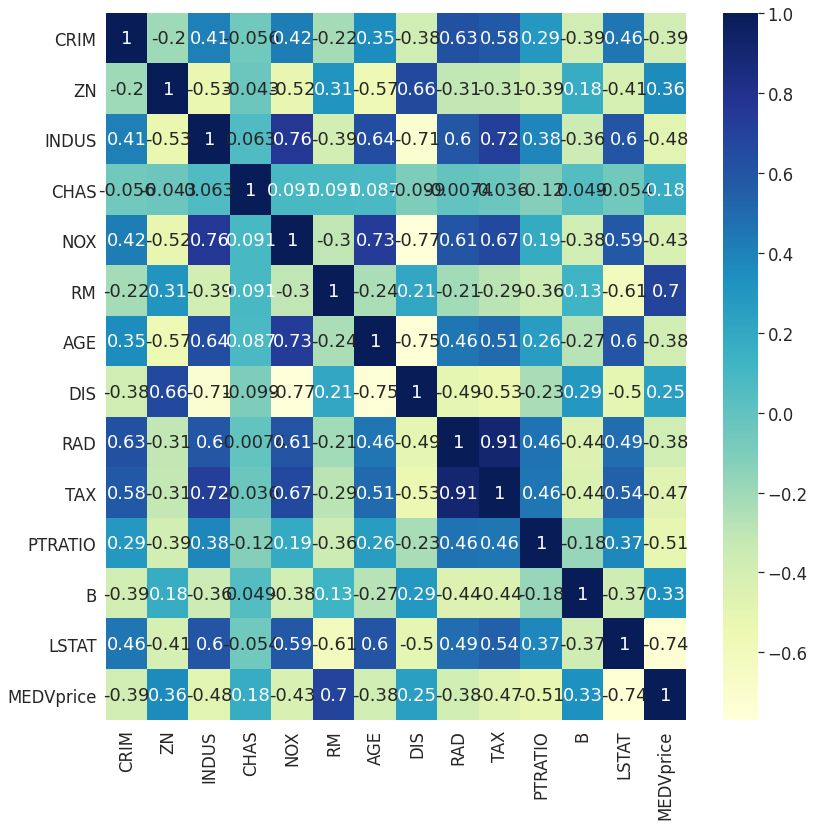

In [15]:
df_heat = df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(data=df_heat, annot=True,cmap="YlGnBu")#annot是在格子裡面印出值

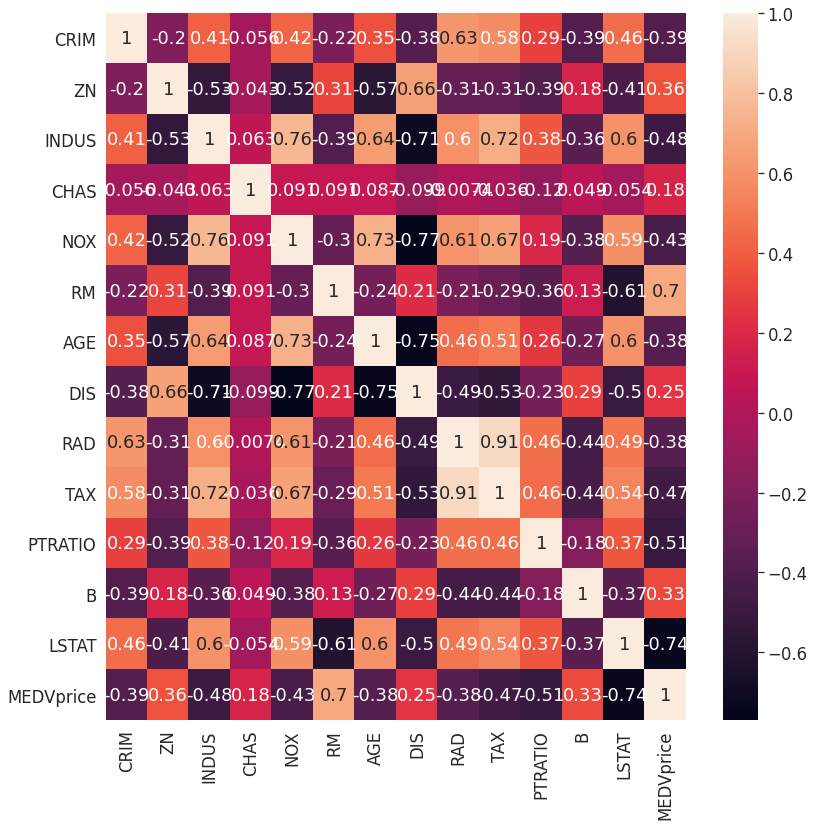

In [16]:
df_heat = df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(data=df_heat, annot=True)

# 房價特徵與房價的相關性

In [17]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LinearRegression()).fit(x_train, y_train)
import numpy as np
np.set_printoptions(suppress=True)
selector.estimator_.coef_

array([ -0.11103262,   0.05797726,   0.01689505,   2.13839616,
       -19.27485205,   3.11124463,   0.00550103,  -1.48228753,
         0.30162441,  -0.01113592,  -0.98836392,   0.00797486,
        -0.5429076 ])

In [18]:
selector.threshold_ 

2.15770715764712

In [19]:
selector.get_support(), boston.feature_names
boston.feature_names[selector.get_support()]

array(['NOX', 'RM'], dtype='<U7')

In [20]:
selector.transform(x_train).shape

(406, 2)

In [21]:
lm.fit(selector.transform(x_train), y_train) # use selected features and train data to create model
r2_train= lm.score(selector.transform(x_train), y_train)
r2_test= lm.score(selector.transform(x_test), y_test)
print(r2_train, r2_test)  

0.513678159069731 0.6016329180434612


# 標準化

In [22]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.fit_transform(x_test)



In [23]:
from sklearn.linear_model import LinearRegression
selector = SelectFromModel(estimator=LinearRegression()).fit(x_std, y_train)

In [24]:
selector.estimator_.coef_

array([-1.01350474,  1.34600685,  0.11557489,  0.57619956, -2.25207327,
        2.13772192,  0.15680574, -3.13809674,  2.62646459, -1.88649713,
       -2.13976217,  0.73920792, -3.90753383])

In [25]:
selector.threshold_

1.6950345655365453

In [26]:
selector.get_support(), boston.feature_names

(array([False, False, False, False,  True,  True, False,  True,  True,
         True,  True, False,  True]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [27]:
boston.feature_names[selector.get_support()]

array(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [28]:
selector.transform(x_train).shape

(406, 7)

In [29]:
selector.transform(x_train)

array([[  0.584 ,   5.837 ,   1.9976, ..., 666.    ,  20.2   ,  15.69  ],
       [  0.74  ,   6.485 ,   1.9784, ..., 666.    ,  20.2   ,  18.85  ],
       [  0.448 ,   6.169 ,   5.7209, ..., 233.    ,  17.9   ,   5.81  ],
       ...,
       [  0.693 ,   6.405 ,   1.6768, ..., 666.    ,  20.2   ,  19.37  ],
       [  0.507 ,   6.086 ,   3.6519, ..., 307.    ,  17.4   ,  10.88  ],
       [  0.499 ,   5.85  ,   3.9342, ..., 279.    ,  19.2   ,   8.77  ]])

22.47438423645322 [-1.01350474  1.34600685  0.11557489  0.57619956 -2.25207327  2.13772192
  0.15680574 -3.13809674  2.62646459 -1.88649713 -2.13976217  0.73920792
 -3.90753383]


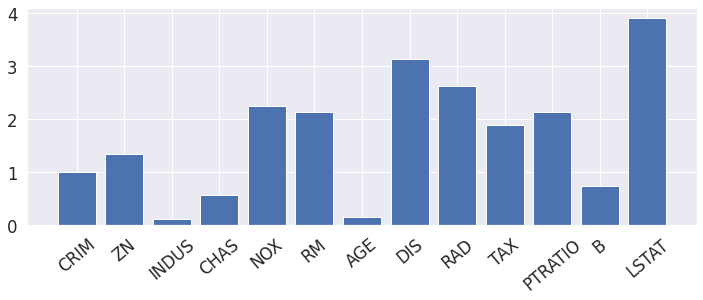

In [30]:
lm = LinearRegression()
lm.fit(x_std, y_train)
print(lm.intercept_ , lm.coef_)


feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.bar(feature_names , abs(lm.coef_))
plt.xticks(rotation=40)
plt.show()

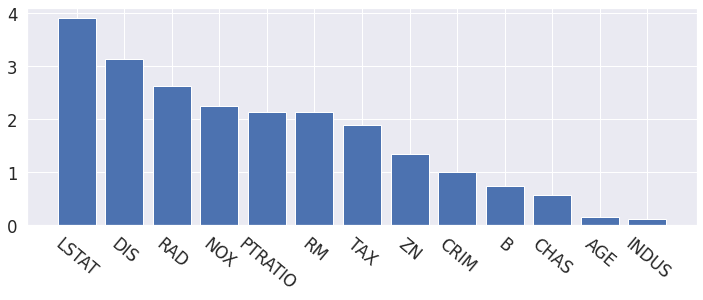

,score,feature
12,3.907534,LSTAT
7,3.138097,DIS
8,2.626465,RAD
4,2.252073,NOX
10,2.139762,PTRATIO
5,2.137722,RM
9,1.886497,TAX
1,1.346007,ZN
0,1.013505,CRIM
11,0.739208,B


In [31]:
plt.figure(figsize=(12, 4))
feature_sort = pd.DataFrame( abs(lm.coef_), columns=['score'])
feature_sort['feature'] = feature_names
feature_sort = feature_sort.sort_values(by='score', ascending=False)

plt.bar(feature_sort['feature'] , feature_sort['score'])
plt.xticks(rotation=-40)
plt.show()
feature_sort

In [32]:
p=7
lm.fit(selector.transform(x_train), y_train) # use train data to create model
r2_train= lm.score(selector.transform(x_train), y_train)
r2_test= lm.score(selector.transform(x_test), y_test)
r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p-1)) )
print(r2_train, r2_test, r2_adj)  

0.703109162977364 0.746474875709243 0.7271849206001637


In [33]:
lm.intercept_ , lm.coef_

(45.64257657158676,
 array([-18.0086473 ,   3.38104635,  -1.08639755,   0.19455093,
         -0.00887728,  -1.13665962,  -0.58922586]))

# K-fold

In [34]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

scores = cross_val_score(lm, selector.transform(x_train), y_train, scoring='r2', cv=5)
scores, scores.mean()  

(array([0.74774285, 0.66866317, 0.66579656, 0.63196233, 0.71394953]),
 0.6856228874195398)

# 殘差圖

In [35]:
y = df['MEDVprice']
Z = df[['NOX', 'RM', 'DIS','PTRATIO', 'LSTAT']]
df[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT',"MEDVprice"]].corr()

,NOX,RM,DIS,PTRATIO,LSTAT,MEDVprice
NOX,1.000000,-0.302188,-0.769230,0.188933,0.590879,-0.427321
RM,-0.302188,1.000000,0.205246,-0.355501,-0.613808,0.695360
DIS,-0.769230,0.205246,1.000000,-0.232471,-0.496996,0.249929
PTRATIO,0.188933,-0.355501,-0.232471,1.000000,0.374044,-0.507787
LSTAT,0.590879,-0.613808,-0.496996,0.374044,1.000000,-0.737663
MEDVprice,-0.427321,0.695360,0.249929,-0.507787,-0.737663,1.000000


In [36]:
lm.fit(Z, df['MEDVprice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
Y_hat = lm.predict(Z)

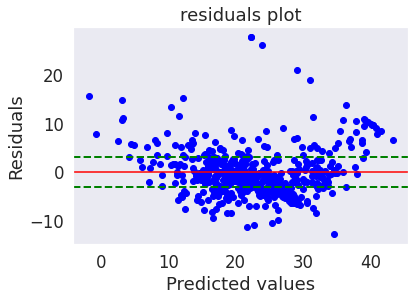

In [38]:
residuals = y - Y_hat
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals)
residual_scatter_plot = plt.scatter(Y_hat, residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.grid()
plt.show()

# RFE

In [39]:
# check feature rank by Recursive Feature Elimination
from sklearn.feature_selection import RFE
n_features_optimal = 1

lm = LinearRegression()
lm.fit(x_std, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(x_std, y_train)
print(rfe)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)


In [40]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [41]:
rfe.ranking_ , boston.feature_names

(array([ 9,  8, 13, 11,  5,  2, 12,  4,  6,  7,  3, 10,  1]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [42]:
a = pd.DataFrame(rfe.ranking_ , boston.feature_names ,columns=['rank'])
a

,rank
CRIM,9
ZN,8
INDUS,13
CHAS,11
NOX,5
RM,2
AGE,12
DIS,4
RAD,6
TAX,7


# 多項式回歸

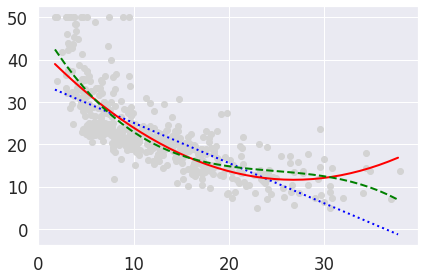

linear_r2: 0.5441462975864797
quadratic_r2: 0.6407168971636612
cubic_r2: 0.6578476405895719


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_lin = df['LSTAT'].values[:, np.newaxis]

regr = LinearRegression()



quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)


X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))



plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,  
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         color='green', 
         lw=2, 
         linestyle='--')


plt.tight_layout()
plt.show()
print('linear_r2:',linear_r2)
print('quadratic_r2:',quadratic_r2)
print('cubic_r2:',cubic_r2)

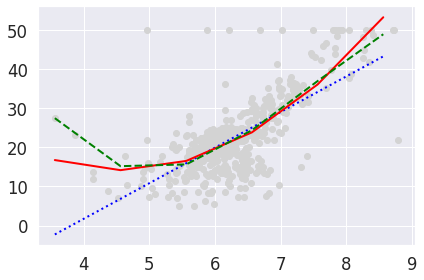

linear_r2: 0.48352545599133423
quadratic_r2: 0.5484256373971057
cubic_r2: 0.5612257226355388


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_lin = df['RM'].values[:, np.newaxis]

regr = LinearRegression()



quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,  
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         color='green', 
         lw=2, 
         linestyle='--')


plt.tight_layout()
plt.show()
print('linear_r2:',linear_r2)
print('quadratic_r2:',quadratic_r2)
print('cubic_r2:',cubic_r2)

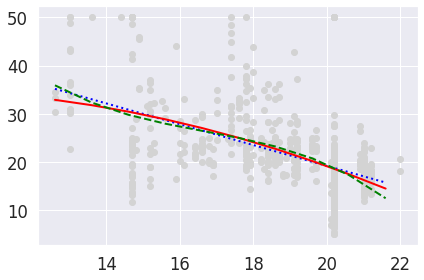

linear_r2: 0.257847318009223
quadratic_r2: 0.2616203176461689
cubic_r2: 0.26685063547138643


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_lin = df['PTRATIO'].values[:, np.newaxis]

regr = LinearRegression()



quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)


X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))



plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,  
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         color='green', 
         lw=2, 
         linestyle='--')


plt.tight_layout()
plt.show()
print('linear_r2:',linear_r2)
print('quadratic_r2:',quadratic_r2)
print('cubic_r2:',cubic_r2)

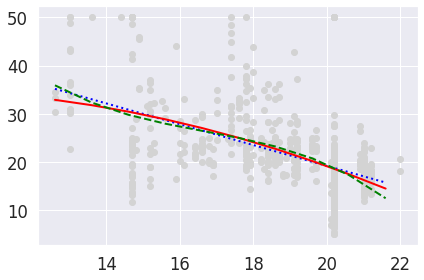

linear_r2: 0.257847318009223
quadratic_r2: 0.2616203176461689
cubic_r2: 0.26685063547138643


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_lin = df['PTRATIO'].values[:, np.newaxis]

regr = LinearRegression()


quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)


X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))



plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,  
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         color='green', 
         lw=2, 
         linestyle='--')


plt.tight_layout()
plt.show()
print('linear_r2:',linear_r2)
print('quadratic_r2:',quadratic_r2)
print('cubic_r2:',cubic_r2)

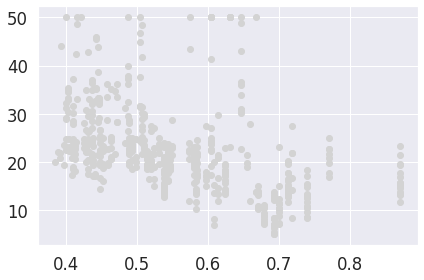

linear_r2: 0.182603042501699
quadratic_r2: 0.1871254361368555
cubic_r2: 0.1938660686968663


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_lin = df['NOX'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

# fit features
X_fit = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]

regr = regr.fit(X_lin, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_lin))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X_lin, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,  
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         color='green', 
         lw=2, 
         linestyle='--')


plt.tight_layout()
plt.show()
print('linear_r2:',linear_r2)
print('quadratic_r2:',quadratic_r2)
print('cubic_r2:',cubic_r2)

In [48]:
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

print('[Linear]')
print('#Features: %d' % x_train.shape[1])
lm = lm.fit(x_train, y_train)
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('\n[Quadratic]')
x_quad_train = quadratic.fit_transform(x_train)
x_quad_test = quadratic.fit_transform(x_test)
print('#Features: %d' % x_quad_train.shape[1])
lm = lm.fit(x_quad_train, y_train)
y_train_pred = lm.predict(x_quad_train)
y_test_pred = lm.predict(x_quad_test)
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('\n[Cubic]')
x_cubic_train = cubic.fit_transform(x_train)
x_cubic_test = cubic.fit_transform(x_test)
print('#Features: %d' % x_cubic_train.shape[1])
lm = lm.fit(x_cubic_train, y_train)
y_train_pred = lm.predict(x_cubic_train)
y_test_pred = lm.predict(x_cubic_test)
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[Linear]
#Features: 13
MSE train: 21.89, test: 23.18
R^2 train: 0.73, test: 0.77

[Quadratic]
#Features: 105
MSE train: 7.43, test: 12.30
R^2 train: 0.91, test: 0.88

[Cubic]
#Features: 560
MSE train: 0.00, test: 240597.03
R^2 train: 1.00, test: -2436.17


# Final model 

***Linear_RFE_features***

In [49]:
cols=['LSTAT', 'RM', 'PTRATIO','DIS', 'NOX']
p = x_quad_train.shape[1]
new_X_train = x_train[cols] 
new_X_test = x_test[cols]
lm = LinearRegression()

lm.fit(new_X_train, y_train) 
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)

r2_train = lm.score(new_X_train, y_train)
r2_test = lm.score(new_X_test, y_test)
print('The R-square for train is: ', r2_train )
print('The R-square for test is: ', r2_test )

r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p -1)) )
print('The Adjusted R^2 for test is: ' + str(r2_adj))

Y_hat = lm.predict(new_X_test) 
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, Y_hat))


intercept = 41.11409356845907
Coef = [ -0.58153643   3.6027713   -1.07855455  -1.07544533 -17.66252856]
The R-square for train is:  0.6979118640037556
The R-square for test is:  0.733275944388764
The Adjusted R^2 for test is: 5.400946917585395
The mean square error of price and predicted value using multifit is:  26.330918752724543


**Quadratic_RFE_features**

In [50]:
'LSTAT', 'RM', 'PTRATIO','DIS', 'NOX'
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

cols=['LSTAT', 'RM', 'PTRATIO','DIS', 'NOX']
new_X_train = x_train[cols] 
new_X_test = x_test[cols]

print('[Quadratic]')
x_quad_train = quadratic.fit_transform(new_X_train)
x_quad_test = quadratic.fit_transform(new_X_test)
print('#Features: %d' % x_quad_train.shape[1])

lm = lm.fit(x_quad_train, y_train)
y_train_pred = lm.predict(x_quad_train)
y_test_pred = lm.predict(x_quad_test)
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)


[Quadratic]
#Features: 21
MSE train: 13.24, test: 12.33
R^2 train: 0.84, test: 0.88
intercept = -205.73149603753126
Coef = [  0.           1.51297764  38.84635133  13.00321586 -11.1926007
   5.15259036   0.02872873  -0.05955068  -0.10132798   0.10550634
  -1.85452953  -0.12847653  -1.46220546   0.63931    -13.55715156
  -0.12175316   0.10166551   1.45958308   0.24515386   1.2586962
  48.24516542]


**`Linear_Selectfrommodel_features`**

In [64]:
cols=['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
p = x_quad_train.shape[1]
new_X_train = x_train[cols] 
new_X_test = x_test[cols]
lm = LinearRegression()

lm.fit(new_X_train, y_train) 
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)

r2_train = lm.score(new_X_train, y_train)
r2_test = lm.score(new_X_test, y_test)
print('The R-square for train is: ', r2_train )
print('The R-square for test is: ', r2_test )

r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p -1)) )
print('The Adjusted R^2 for test is: ' + str(r2_adj))

Y_hat = lm.predict(new_X_test) 
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, Y_hat))


intercept = 45.64257657158747
Coef = [-18.0086473    3.38104635  -1.08639755   0.19455093  -0.00887728
  -1.13665962  -0.58922586]
The R-square for train is:  0.703109162977364
The R-square for test is:  0.7464748757092432
The Adjusted R^2 for test is: 0.601603376114525
The mean square error of price and predicted value using multifit is:  25.02792421244622


**Quadratic_Selectfrommodel_features**

In [63]:
#'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

cols=['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
new_X_train = x_train[cols] 
new_X_test = x_test[cols]

print('[Quadratic]')
x_quad_train = quadratic.fit_transform(new_X_train)
x_quad_test = quadratic.fit_transform(new_X_test)
print('#Features: %d' % x_quad_train.shape[1])

lm = lm.fit(x_quad_train, y_train)
y_train_pred = lm.predict(x_quad_train)
y_test_pred = lm.predict(x_quad_test)
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)


[Quadratic]
#Features: 36
MSE train: 82.47, test: 129.50
R^2 train: -0.02, test: -0.31
intercept = 14082853724.019669
Coef = [-1.40828538e+10 -1.53731437e+01  3.27521116e+01 -1.29132006e+01
  1.10727244e+00 -1.73379028e-01  8.39613681e+00 -2.14854625e+00
  1.76234163e+01 -1.16087645e+01  5.59443370e+00  4.33426728e-01
  2.35305841e-01 -2.59576372e+00 -4.67619270e+00 -8.69786812e-01
  2.27446409e+00 -6.09150336e-01  4.55201479e-02 -2.66963807e+00
  1.32173979e+00  2.68627732e-01  1.13828677e+00 -3.00775128e-02
 -2.44647462e-01 -1.62434653e-01  5.97547946e-01 -2.30982704e-02
 -1.46062043e-01  6.33003176e-02 -1.56660719e-04  6.69671225e-03
 -2.89492648e-03  3.20073242e-01 -3.48106505e-01  1.28546759e-01]


**Quadratic_RFE_features殘差圖**

[Quadratic]
#Features: 21


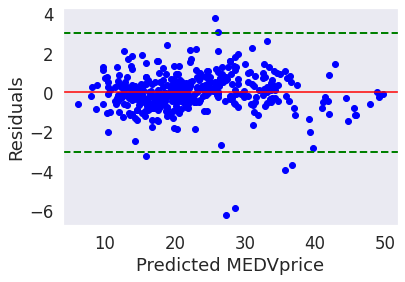

<Figure size 432x288 with 0 Axes>

In [73]:
'LSTAT', 'RM', 'PTRATIO','DIS', 'NOX'
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

cols=['LSTAT', 'RM', 'PTRATIO','DIS', 'NOX']
new_X_train = x_train[cols] 
new_X_test  = x_test[cols]

print('[Quadratic]')
x_quad_train = quadratic.fit_transform(new_X_train)
x_quad_test = quadratic.fit_transform(new_X_test)
print('#Features: %d' % x_quad_train.shape[1])

lm = lm.fit(x_quad_train, y_train)
y_train_pred = lm.predict(x_quad_train)
y_test_pred = lm.predict(x_quad_test)
residuals = (y_train_pred - y_train)
std_residuals = preprocessing.scale(residuals)
residuals_scatter_plot = plt.scatter(y_train_pred, std_residuals,color='blue',marker='o')
plt.xlabel('Predicted MEDVprice')
plt.ylabel('Residuals')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.grid()
plt.show()
plt.savefig("./Residuals_MEDVprice_pred.png" ,dpi = 300)
